In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("white")
plt.rcParams["figure.figsize"] = (20, 10)
sns.set_palette(sns.color_palette("hls", 10))

# Dynamicity metrics - LAC
Define a set of metrics that capture the level of Dynamicity, i.e. indicate how dynamic fraud is.

Secondary it would be good if we can predict the direction of the fraud.

## Shorlist
- first, second moment
- volatility
- distribution fit:
    - KL divergence
    - KS test
- Linear regression
    - $R^2$
    - Mean Square Error
    - ...

## Data
https://datamarket.com/data/set/237v/daily-foreign-exchange-rates-31-december-1979-31-december-1998#!ds=237v!2jx6&display=line

In [15]:
df = pd.read_csv('../data/raw/LAC_daily-foreign-exchange-rates-31-.csv').dropna()
df['Date'] = pd.to_datetime(df['Date'])
df['Australia/US'] = df['Australia/US'].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4774 entries, 0 to 4773
Data columns (total 9 columns):
Date            4774 non-null datetime64[ns]
Australia/US    4774 non-null float64
British/US      4774 non-null float64
Canadian/US     4774 non-null float64
Dutch/US        4774 non-null float64
French/US       4774 non-null float64
German/US       4774 non-null float64
Japanese/US     4774 non-null float64
Swiss/US        4774 non-null float64
dtypes: datetime64[ns](1), float64(8)
memory usage: 373.0 KB


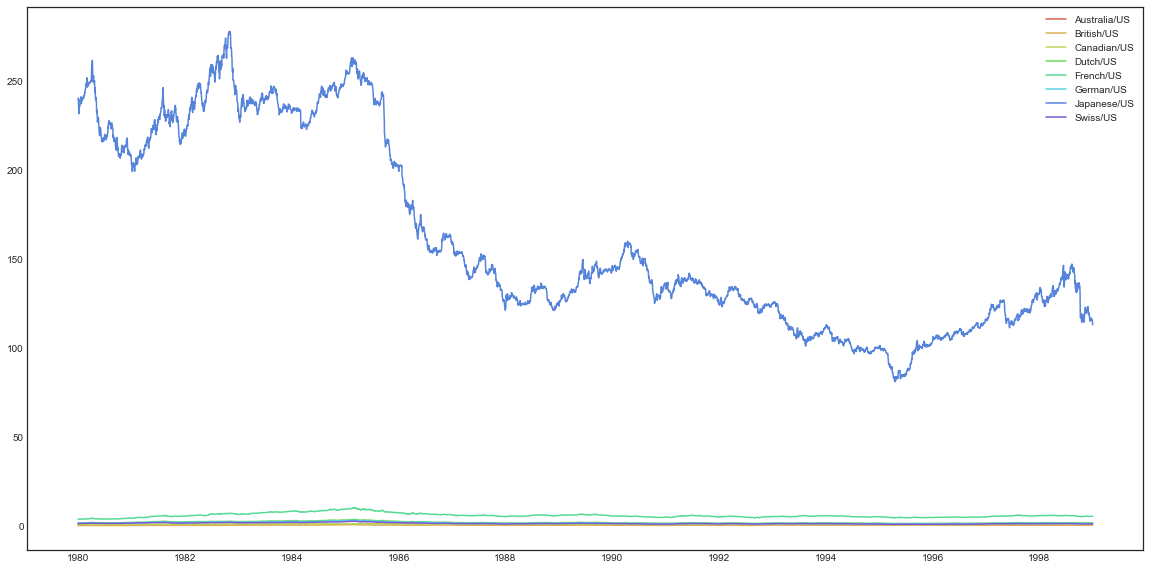

In [16]:
for col in df.iloc[:, 1:].columns:
    plt.plot(df['Date'], df[col], label=col)
plt.legend()

### Normalise the data

In [17]:
for col in df.iloc[:, 1:].columns:
    std_dev = df[col].std()
    mean = df[col].mean()
    df.loc[:, col] = (df[col] - mean) / std_dev

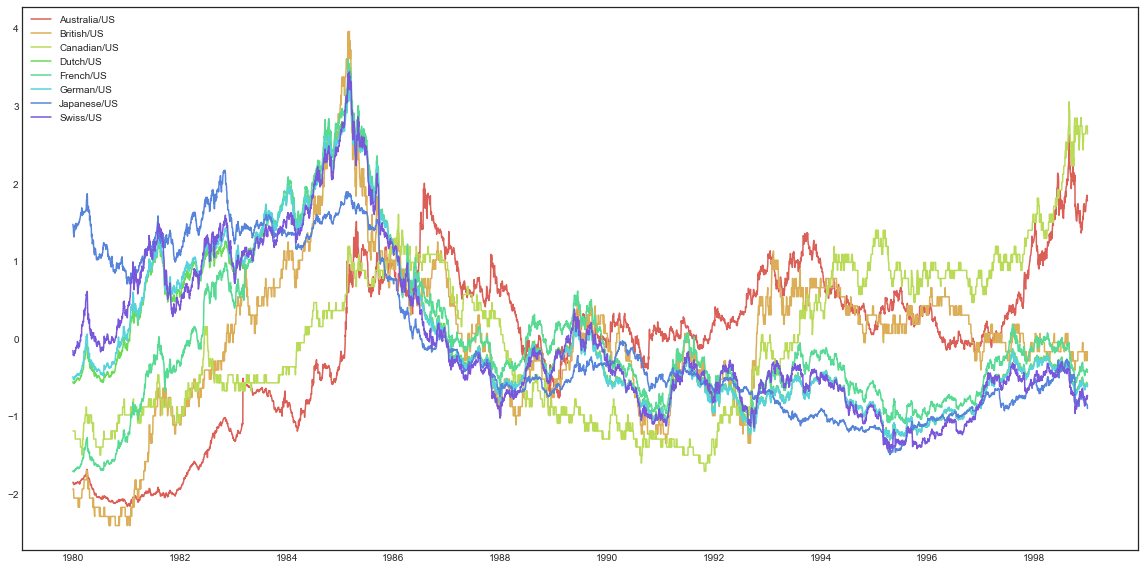

In [18]:
for col in df.iloc[:, 1:].columns:
    plt.plot(df['Date'], df[col], label=col)
plt.legend()

### Summary statistics

In [19]:
df.iloc[:, 1:].describe()

,Australia/US,British/US,Canadian/US,Dutch/US,French/US,German/US,Japanese/US,Swiss/US
count,4.774000e+03,4.774000e+03,4.774000e+03,4.774000e+03,4.774000e+03,4.774000e+03,4.774000e+03,4.774000e+03
mean,3.333925e-16,-8.334812e-17,-9.406431e-16,1.428825e-16,2.381375e-16,2.857650e-16,5.239025e-16,-4.286475e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.159685e+00,-2.405291e+00,-1.704287e+00,-1.304001e+00,-1.711525e+00,-1.299615e+00,-1.492631e+00,-1.439761e+00
25%,-5.328243e-01,-5.193188e-01,-8.769261e-01,-6.706074e-01,-6.317753e-01,-6.827351e-01,-7.375164e-01,-6.599325e-01
50%,1.587157e-01,7.004742e-02,-4.956539e-02,-3.617791e-01,-2.358940e-01,-3.643808e-01,-4.224466e-01,-3.671595e-01
75%,6.413012e-01,5.415404e-01,8.812154e-01,6.433883e-01,3.003304e-01,6.848665e-01,1.119060e+00,6.615934e-01
max,2.621394e+00,3.959864e+00,3.053037e+00,3.409074e+00,3.602856e+00,3.318174e+00,2.171857e+00,3.438889e+00
